In [2]:
import pandas as pd


In [3]:
titles = pd.read_csv('titles.csv')
titles

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015
...,...,...
210586,Hu tu nu si ji,1982
210587,Le mouton noir,1922
210588,Edge of the Unknown,2015
210589,E yue,2005


In [4]:
cast = pd.read_csv('cast.csv')
cast


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
1048570,Brown Soup Thing,2008,Paul P.K. Kim,actor,Joey's Friend PK,22.0
1048571,The Social Network,2010,Paul S. Kim,actor,Rob,NaN
1048572,The Long Lunch,2003,Pauly Kim,actor,Karaoke Star,32.0
1048573,Mr. Saturday Night,1992,Peter Kim,actor,Maitre d',35.0


In [5]:
# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1948,0.0,1.0
1949,1.0,0.0
1950,0.0,1.0


In [6]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
8


In [7]:
# How many years have been "Batman years",with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
22


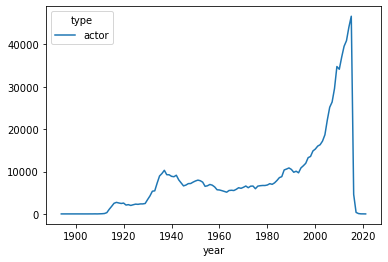

In [8]:
# Plot the number of actor roles each year and the number of actress roles each year over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

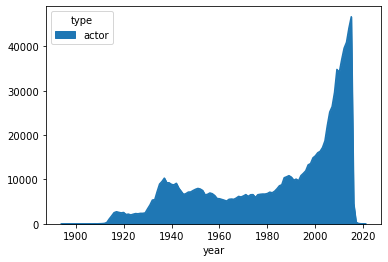

In [9]:
# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

In [12]:
# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.


In [14]:
# Plot the fraction of roles that have been 'actor' roles each year in the history of film.


In [16]:
# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

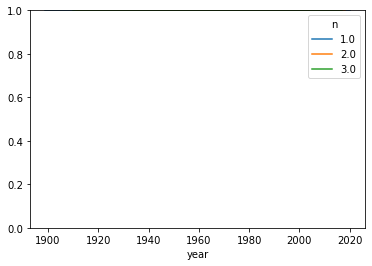

In [19]:
# where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor)
r = r.unstack('n')
r.plot(ylim=[0,1])